# MACHINE LEARNING - Programming Assignment - 2


**Student Name:** RISHIT ANAND  
**Student ID:** 2025AB05172  
**Date:** 2026-02-15

---

![Screenshot 2026-02-13 215657.png](<attachment:Screenshot 2026-02-13 215657.png>)
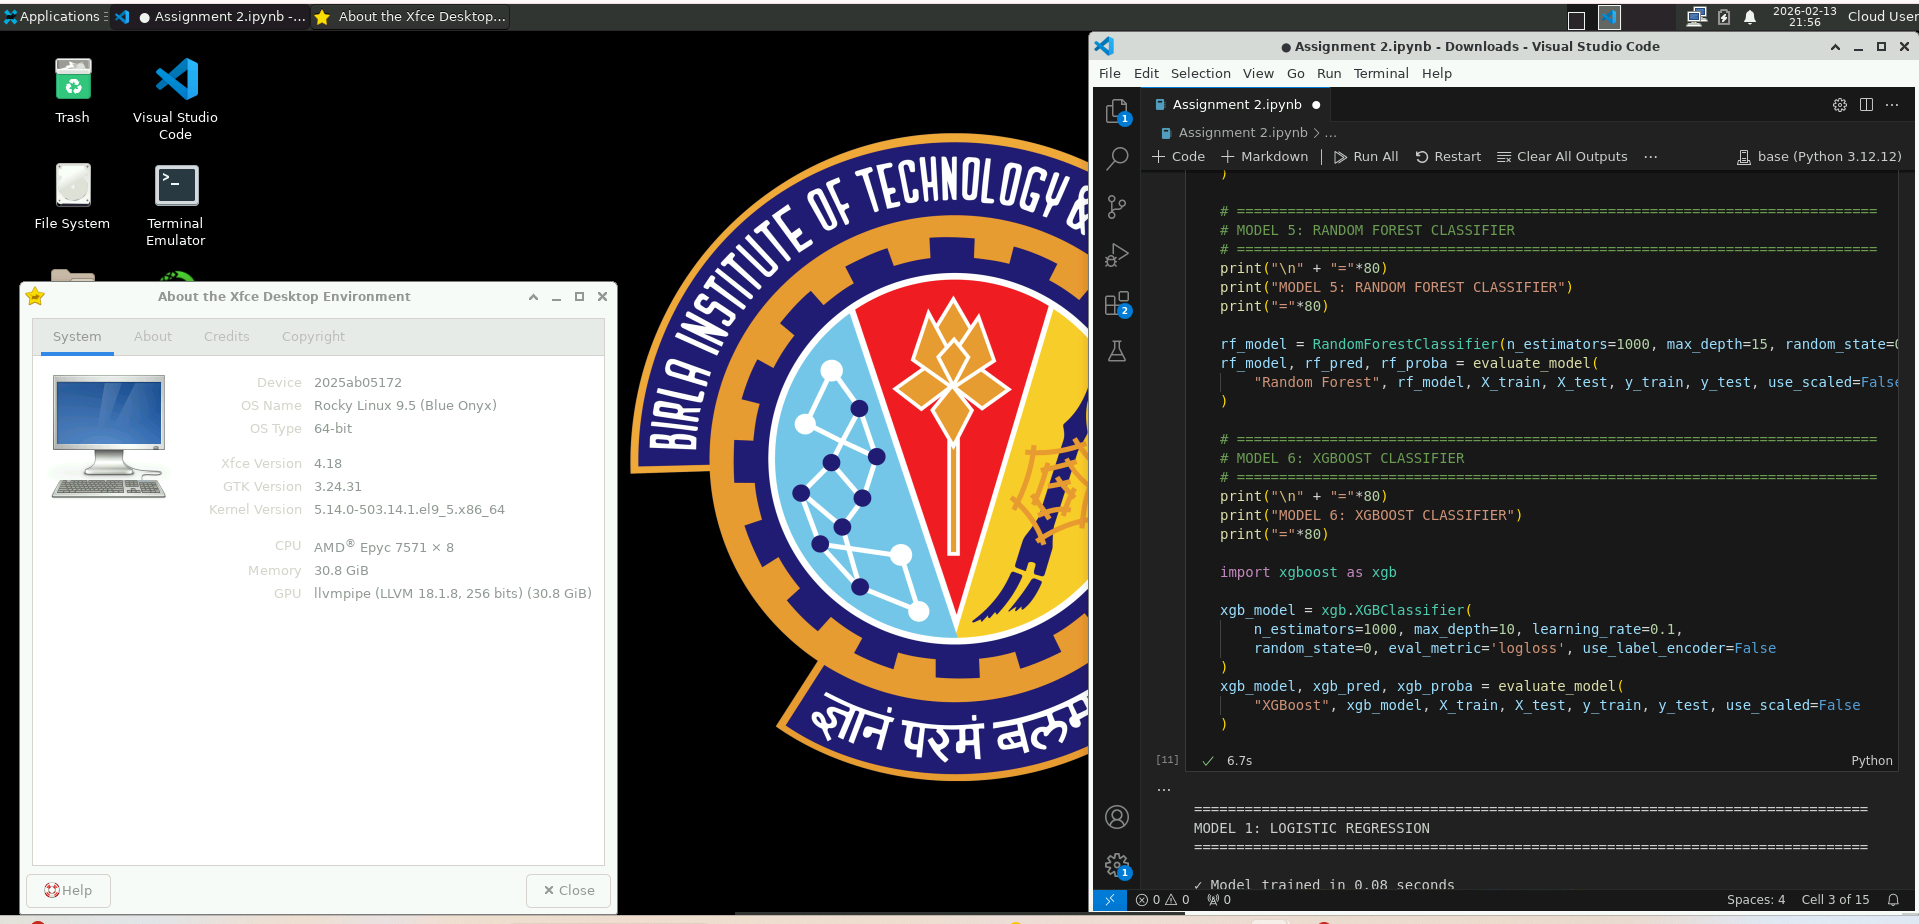

![Screenshot 2026-02-13 215727.png](<attachment:Screenshot 2026-02-13 215727.png>)
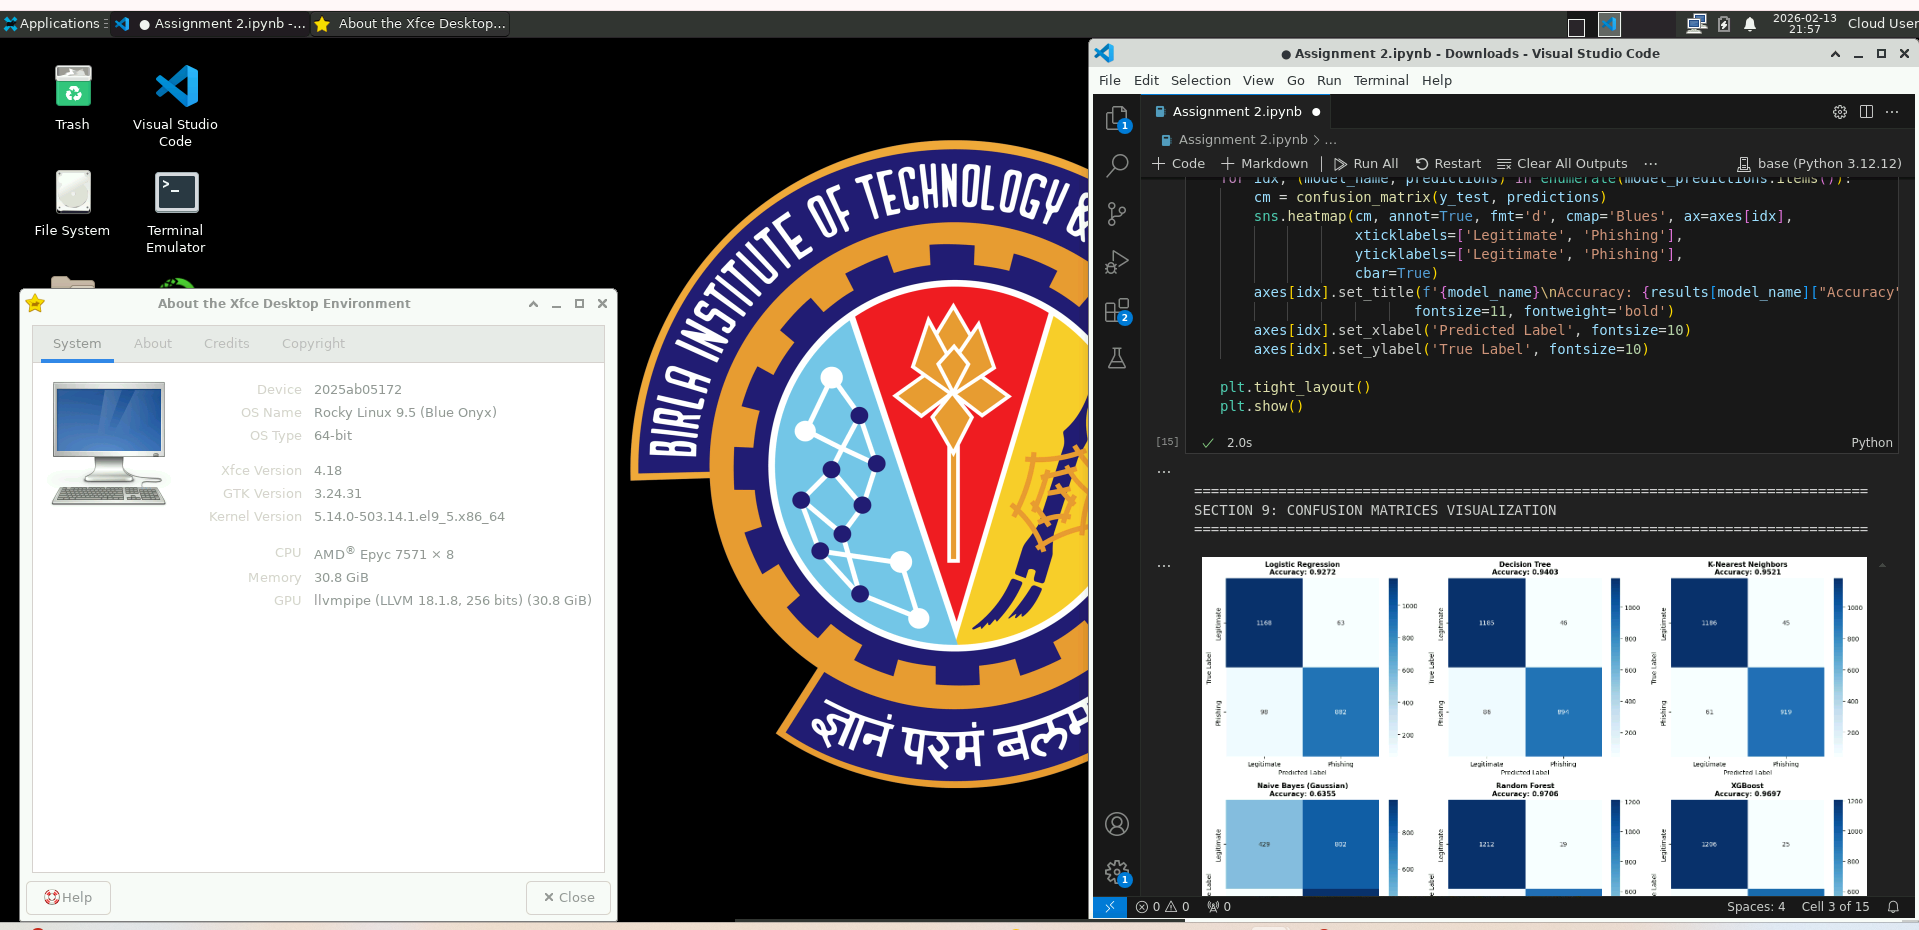

In [ ]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, confusion_matrix,
    classification_report, roc_curve
)

# Machine Learning Classification Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier  
import xgboost as xgb

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [11]:
# LOAD AND EXAMINE DATASET
# Reading the CSV file containing phishing website detection features
# https://www.kaggle.com/datasets/akashkr/phishing-website-dataset/data
data = pd.read_csv("D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENTS/ASSIGNMENT 2/dataset.csv")

print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (11055, 32)


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
# INSPECT DATA INFORMATION AND STATISTICS
# Show statistical summary (min, max, mean, quartiles) for all columns
data.describe(include="all")

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# EXPLORATORY DATA ANALYSIS (EDA)
print("\n" + "=" * 80)
print("Q1: DATASET EXAMINATION")
print("=" * 80)
print("\n--- First 5 rows of training data ---")
print(data.head())
print("\n--- Data Types and Non-Null Counts ---")
print(data.info())


Q1: DATASET EXAMINATION

--- First 5 rows of training data ---
   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1      


Missing Values:
No missing values found ✓

Target Distribution (Result column):
Result
 1    6157
-1    4898
Name: count, dtype: int64

Class Balance (Percentage Distribution):
Result
 1    55.694256
-1    44.305744
Name: proportion, dtype: float64

✓ Class distribution plot saved


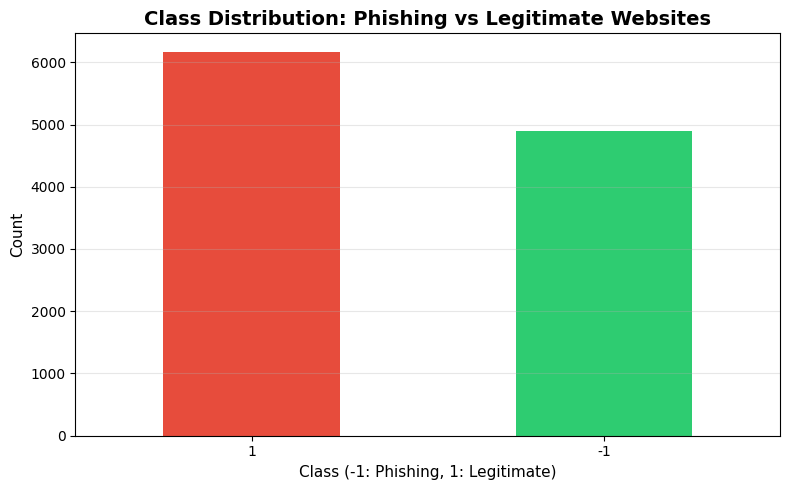

In [ ]:
# COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA)
# Check for missing values in the dataset
print("\nMissing Values:")
missing = data.isnull().sum()  # Count null values per column
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found")

# Identify and analyze the target column
print("\nTarget Distribution (Result column):")
target_col = 'Result'

print(data[target_col].value_counts())
print(f"\nClass Balance (Percentage Distribution):")
print(data[target_col].value_counts(normalize=True) * 100)

# VISUALIZATION: Create a bar chart showing class distribution
plt.figure(figsize=(8, 5))
data[target_col].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Class Distribution: Phishing vs Legitimate Websites', fontsize=14, fontweight='bold')
plt.xlabel('Class (-1: Phishing, 1: Legitimate)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


SECTION 3: DATA PREPROCESSING & FEATURE ENGINEERING

Original Features: 31
Original Samples: 11055

--- Feature Engineering ---

3. Total features after engineering: 38 (original: 31)

--- Top 10 Features Correlated with Phishing ---
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
SSL_HTTPS_Security             0.463105
Prefix_Suffix                  0.348606
web_traffic                    0.346103
Reputation_Score               0.330436
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
Domain_registeration_length    0.225789
Name: Phishing, dtype: float64

✓ Feature correlation plot saved


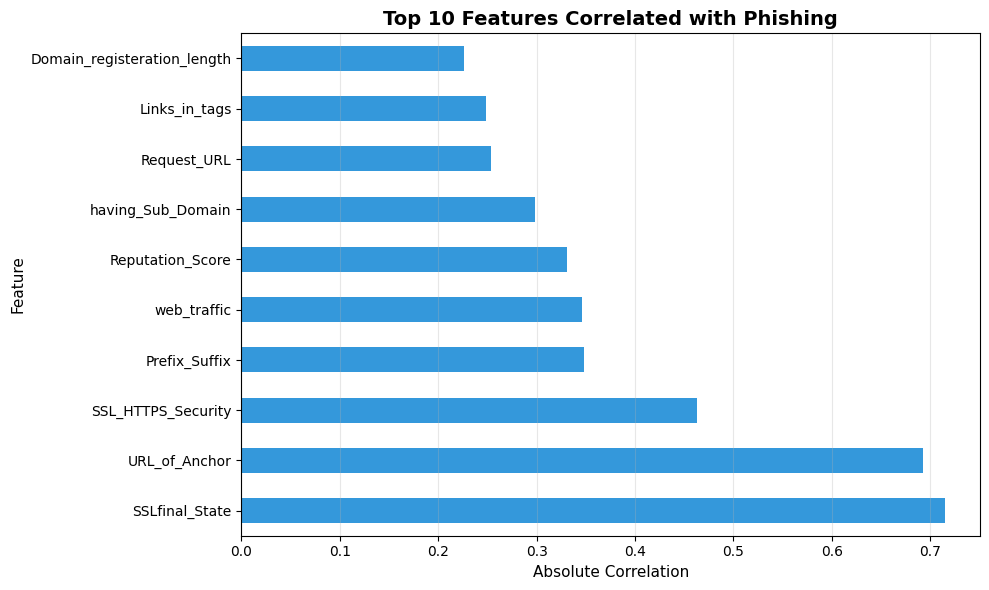


--- Train-Test Split ---
Training set: 8844 samples (80.0%)
Test set: 2211 samples (20.0%)
Training set class distribution:
  Legitimate (0): 4926 (55.7%)
  Phishing (1): 3918 (44.3%)


In [ ]:
# SECTION 3: DATA PREPROCESSING & FEATURE ENGINEERING
# ============================================================================
# Preparing data for model training: separate features/target, engineer new features, scale data

print("\n" + "="*80)
print("SECTION 3: DATA PREPROCESSING & FEATURE ENGINEERING")
print("="*80)

# Separate features (X) and target variable (y)
X = data.drop(columns=[target_col])
y = data[target_col].values

# Convert target to binary classification: 0 = Legitimate, 1 = Phishing
# Original encoding: -1 = Phishing, 1 = Legitimate
y_binary = np.where(y == -1, 1, 0)

print(f"\nOriginal Features: {X.shape[1]}")
print(f"Original Samples: {X.shape[0]}")

# FEATURE ENGINEERING: Creating new features from existing ones
print("\n--- Feature Engineering ---")
X['SSL_HTTPS_Security'] = X['SSLfinal_State'] * X['HTTPS_token']  # SSL and HTTPS interaction
X['Domain_Trust_Score'] = (X['age_of_domain'] + X['DNSRecord'] + X['Google_Index']) / 3  # Average domain trust
X['Suspicious_URL_Score'] = (X['having_IPhaving_IP_Address'] + X['having_At_Symbol'] + 
                              X['double_slash_redirecting'] + X['Prefix_Suffix']) / 4  # URL suspicion level
X['Reputation_Score'] = (X['Page_Rank'] + X['web_traffic'] + X['Google_Index']) / 3  # Overall website reputation

# 2. Create binary risk indicator features
# These help identify high-risk characteristics
X['High_Risk_URL'] = ((X['having_IPhaving_IP_Address'] == -1) & 
                      (X['Shortining_Service'] == -1)).astype(int)  # 1 if both risky indicators present
X['Suspicious_Redirect'] = ((X['Redirect'] == 0) & 
                            (X['double_slash_redirecting'] == -1)).astype(int)  # 1 if unusual redirect patterns

# 3. Create binary feature for URL length
# Long URLs are often associated with phishing
X['URL_Length_Binary'] = (X['URLURL_Length'] == -1).astype(int)  # 1 if URL is suspiciously long

print("\n3. Total features after engineering: {} (original: {})".format(
    X.shape[1], len(data.columns) - 1))

# Handle any remaining missing values using median imputation
if X.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    X = X.fillna(X.median())
    print("Missing values filled with median")

# FEATURE CORRELATION ANALYSIS
# Identifing which features are most strongly correlated with phishing
print("\n--- Top 10 Features Correlated with Phishing ---")
y_for_corr = pd.Series(y_binary, name='Phishing')
X_with_target = pd.concat([X, y_for_corr], axis=1)
correlations = X_with_target.corr()['Phishing'].abs().sort_values(ascending=False)[1:11]
print(correlations)

# VISUALIZATION: Create horizontal bar plot of top features
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='#3498db')
plt.title('Top 10 Features Correlated with Phishing', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
print("\nFeature correlation plot saved")
plt.show()

# TRAIN-TEST SPLIT
# Split data into training (80%) and testing (20%) sets with stratification
print("\n--- Train-Test Split ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=0, stratify=y_binary
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training set class distribution:")
print(f"  Legitimate (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  Phishing (1): {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

# FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SECTION 4: MODEL EVALUATION FUNCTION
# Initialize dictionary to store results for all models
results = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test, use_scaled=True):
    """
    Train and evaluate a machine learning model with comprehensive metrics.
    """
    # Select data
    X_tr = X_train_scaled if use_scaled else X_train
    X_te = X_test_scaled if use_scaled else X_test
    
    # Train the model and measure training time
    import time
    start_time = time.time()
    model.fit(X_tr, y_train)
    training_time = time.time() - start_time
    
    # Make predictions on test set
    y_pred = model.predict(X_te)
    
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_te)[:, 1] 
    else:
        y_pred_proba = model.decision_function(X_te)
    
    # CALCULATE EVALUATION METRICS
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Store results in dictionary for later comparison
    results[name] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc,
        'MCC Score': mcc,
        'Training Time (s)': training_time
    }
    
    # Print performance summary
    print(f"\n✓ Model trained in {training_time:.2f} seconds")
    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  AUC Score: {auc:.4f}")
    print(f"  MCC Score: {mcc:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return model, y_pred, y_pred_proba

In [17]:
# SECTION 5: TRAIN AND EVALUATE ALL 6 MODELS
print("\n" + "="*80)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*80)

lr_model = LogisticRegression(max_iter=10000, random_state=0)
lr_model, lr_pred, lr_proba = evaluate_model(
    "Logistic Regression", lr_model, X_train, X_test, y_train, y_test, use_scaled=True
)

# ============================================================================
# MODEL 2: DECISION TREE CLASSIFIER
# ============================================================================
print("\n" + "="*80)
print("MODEL 2: DECISION TREE CLASSIFIER")
print("="*80)

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=0)
dt_model, dt_pred, dt_proba = evaluate_model(
    "Decision Tree", dt_model, X_train, X_test, y_train, y_test, use_scaled=False
)

# ============================================================================
# MODEL 3: K-NEAREST NEIGHBORS CLASSIFIER
# ============================================================================
print("\n" + "="*80)
print("MODEL 3: K-NEAREST NEIGHBORS CLASSIFIER")
print("="*80)

knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model, knn_pred, knn_proba = evaluate_model(
    "K-Nearest Neighbors", knn_model, X_train, X_test, y_train, y_test, use_scaled=True
)

# ============================================================================
# MODEL 4: NAIVE BAYES CLASSIFIER (GAUSSIAN)
# ============================================================================
print("\n" + "="*80)
print("MODEL 4: NAIVE BAYES CLASSIFIER (GAUSSIAN)")
print("="*80)

nb_model = GaussianNB()
nb_model, nb_pred, nb_proba = evaluate_model(
    "Naive Bayes (Gaussian)", nb_model, X_train, X_test, y_train, y_test, use_scaled=True
)

# ============================================================================
# MODEL 5: RANDOM FOREST CLASSIFIER
# ============================================================================
print("\n" + "="*80)
print("MODEL 5: RANDOM FOREST CLASSIFIER")
print("="*80)

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=0, n_jobs=-1)
rf_model, rf_pred, rf_proba = evaluate_model(
    "Random Forest", rf_model, X_train, X_test, y_train, y_test, use_scaled=False
)

# ============================================================================
# MODEL 6: XGBOOST CLASSIFIER
# ============================================================================
print("\n" + "="*80)
print("MODEL 6: XGBOOST CLASSIFIER")
print("="*80)

import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=1000, max_depth=10, learning_rate=0.1, 
    random_state=0, eval_metric='logloss', use_label_encoder=False
)
xgb_model, xgb_pred, xgb_proba = evaluate_model(
    "XGBoost", xgb_model, X_train, X_test, y_train, y_test, use_scaled=False
)


MODEL 1: LOGISTIC REGRESSION

✓ Model trained in 0.02 seconds

Performance Metrics:
  Accuracy:  0.9272
  Precision: 0.9333
  Recall:    0.9000
  F1 Score:  0.9164
  AUC Score: 0.9787
  MCC Score: 0.8524

Confusion Matrix:
[[1168   63]
 [  98  882]]

MODEL 2: DECISION TREE CLASSIFIER

✓ Model trained in 0.02 seconds

Performance Metrics:
  Accuracy:  0.9403
  Precision: 0.9511
  Recall:    0.9122
  F1 Score:  0.9313
  AUC Score: 0.9872
  MCC Score: 0.8791

Confusion Matrix:
[[1185   46]
 [  86  894]]

MODEL 3: K-NEAREST NEIGHBORS CLASSIFIER

✓ Model trained in 0.00 seconds

Performance Metrics:
  Accuracy:  0.9521
  Precision: 0.9533
  Recall:    0.9378
  F1 Score:  0.9455
  AUC Score: 0.9886
  MCC Score: 0.9028

Confusion Matrix:
[[1186   45]
 [  61  919]]

MODEL 4: NAIVE BAYES CLASSIFIER (GAUSSIAN)

✓ Model trained in 0.01 seconds

Performance Metrics:
  Accuracy:  0.6355
  Precision: 0.5489
  Recall:    0.9959
  F1 Score:  0.7078
  AUC Score: 0.9608
  MCC Score: 0.4311

Confusion M

In [ ]:
# SECTION 6: COMPREHENSIVE MODEL COMPARISON
# ============================================================================
# Summarize and rank all models by performance metrics

print("\n" + "="*80)
print("SECTION 6: COMPREHENSIVE MODEL COMPARISON")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("COMPARISON TABLE: ALL MODELS")
print("="*80)
print(results_df.to_string())

# Identify and display the best performing model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\nBest Model: {best_model_name} with Accuracy = {best_accuracy:.4f}")


SECTION 6: COMPREHENSIVE MODEL COMPARISON

COMPARISON TABLE: ALL MODELS
                                         Model  Accuracy Precision    Recall  F1 Score AUC Score MCC Score Training Time (s)
Random Forest                    Random Forest  0.970602  0.980063  0.953061  0.966374  0.996781  0.940557          1.802351
XGBoost                                XGBoost  0.969697  0.974039  0.957143  0.965517  0.996454  0.938608          1.257371
K-Nearest Neighbors        K-Nearest Neighbors  0.952058   0.95332  0.937755  0.945473   0.98858  0.902799          0.001476
Decision Tree                    Decision Tree  0.940299  0.951064  0.912245   0.93125  0.987189  0.879128           0.02048
Logistic Regression        Logistic Regression  0.927182  0.933333       0.9  0.916364  0.978684  0.852366          0.024832
Naive Bayes (Gaussian)  Naive Bayes (Gaussian)  0.635459  0.548931  0.995918  0.707759  0.960832  0.431137          0.007458

🏆 Best Model: Random Forest with Accuracy = 0.9706



SECTION 7: VISUALIZATIONS


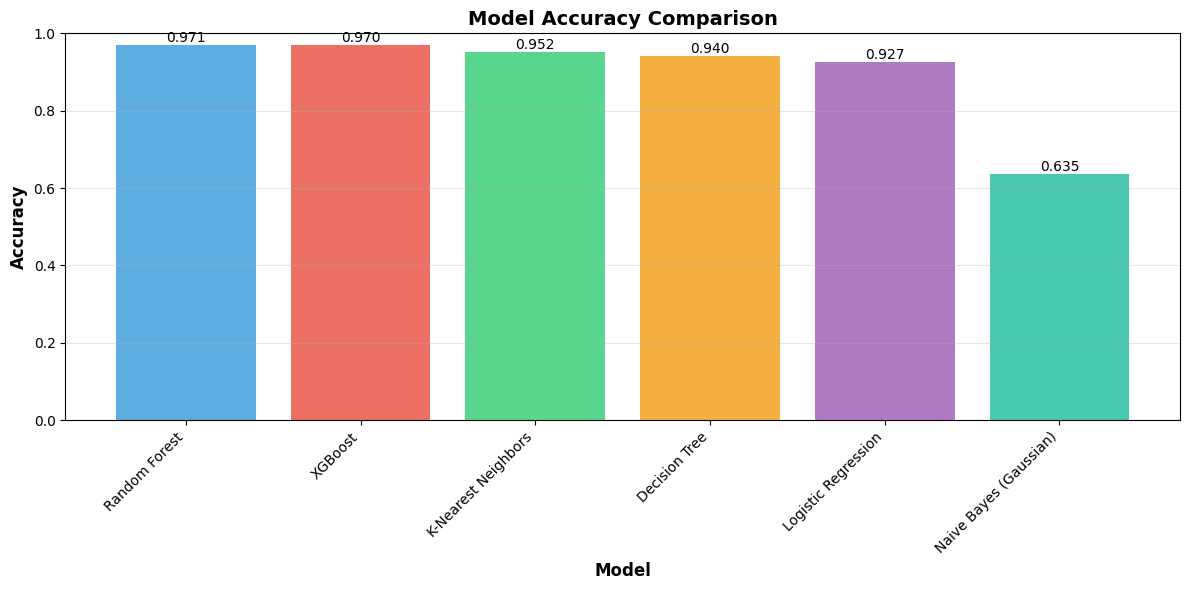

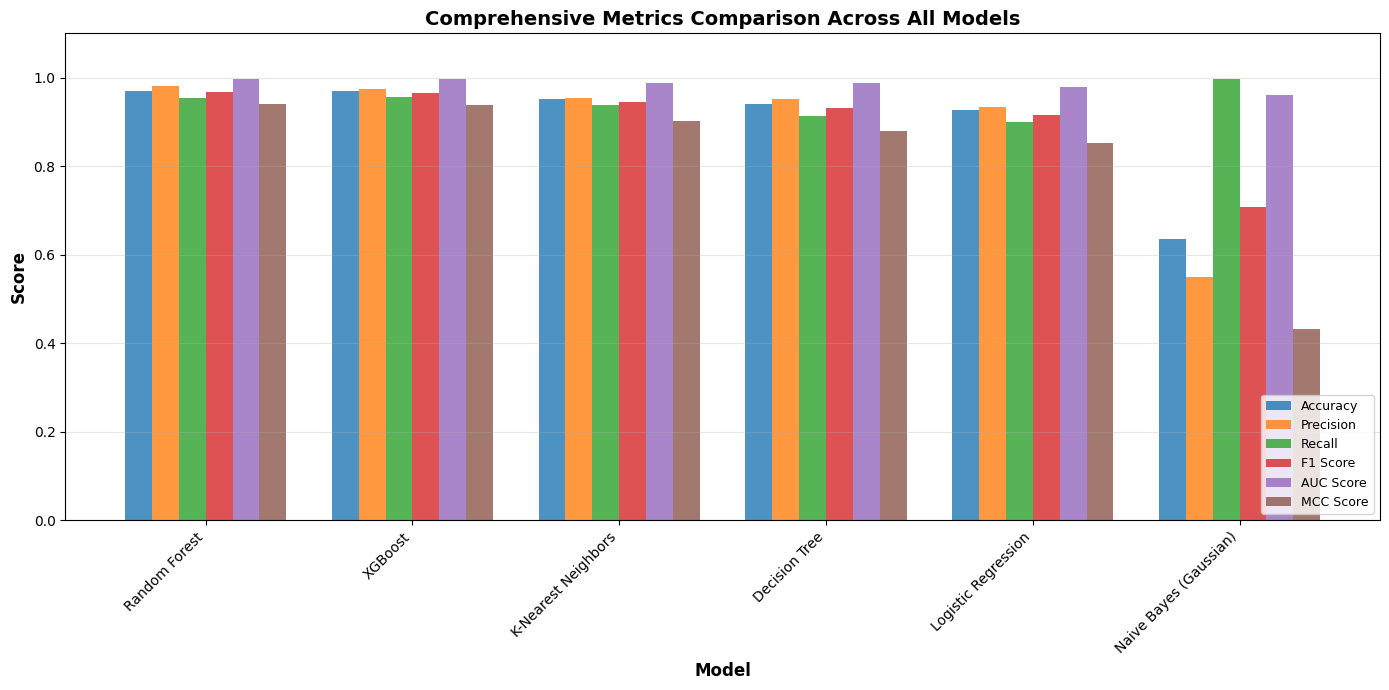

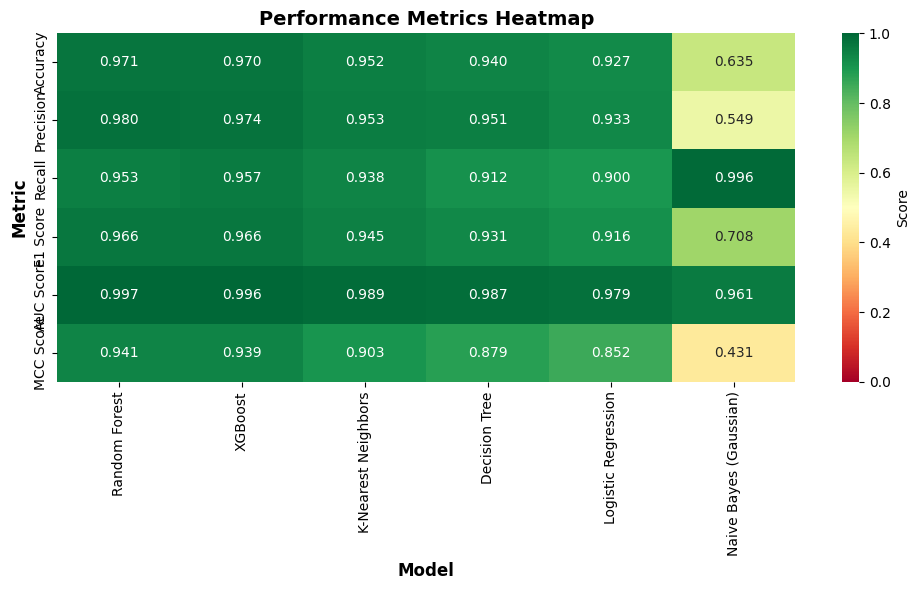

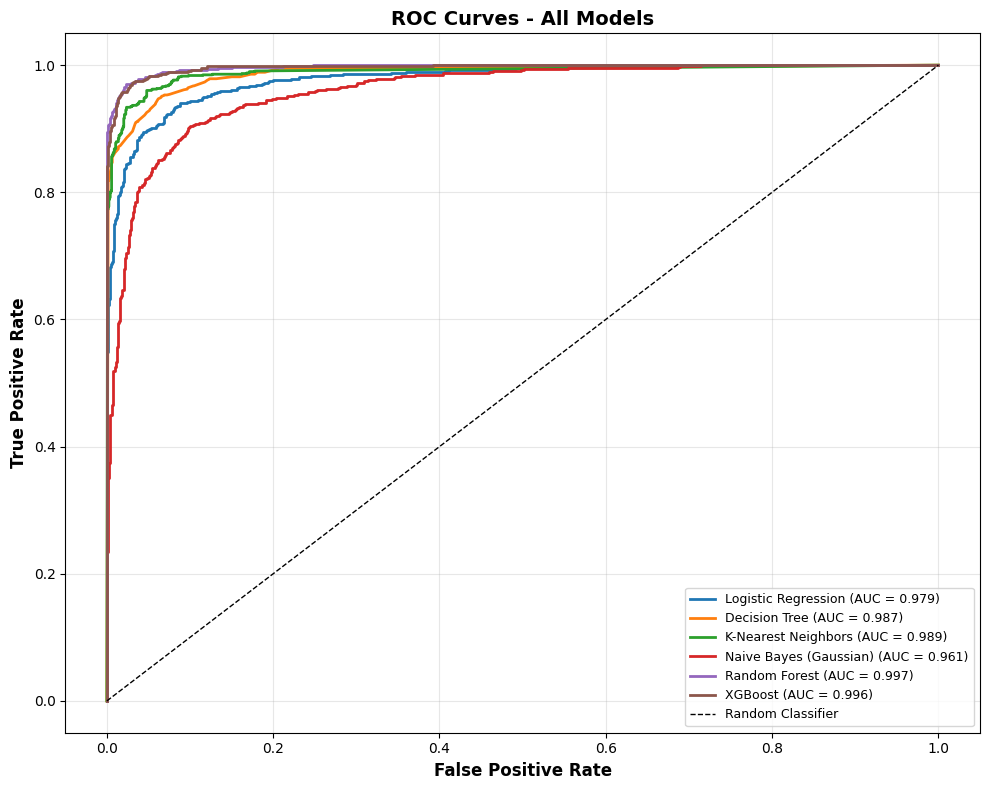

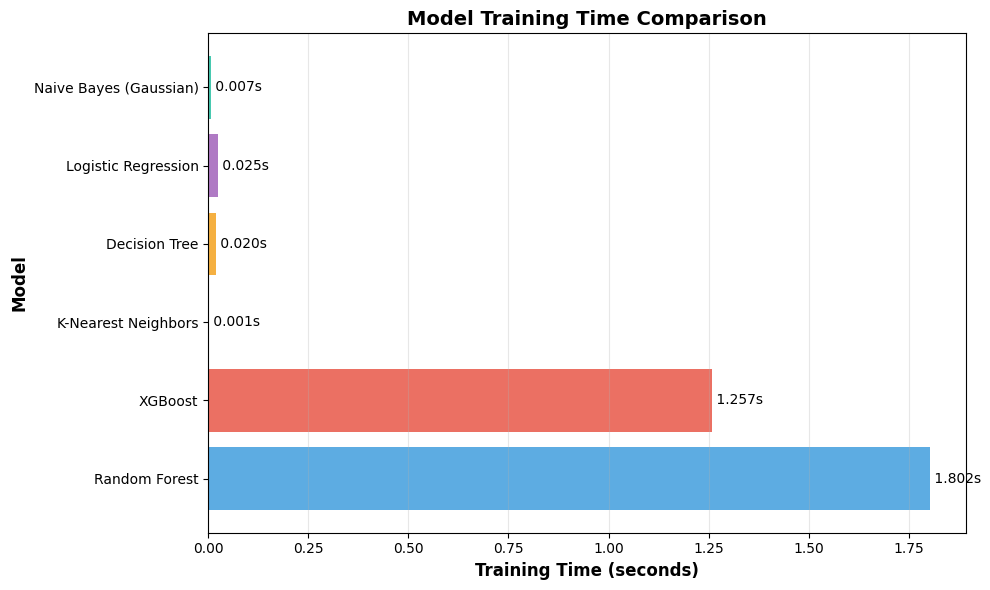

In [ ]:
# SECTION 7: COMPREHENSIVE VISUALIZATIONS

print("\n" + "="*80)
print("SECTION 7: VISUALIZATIONS")
print("="*80)

# ============================================================================
# VISUALIZATION 1: Accuracy Comparison Bar Chart
# ============================================================================
# Shows which model has the highest accuracy
plt.figure(figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=colors, alpha=0.8)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 2: All Metrics Comparison (Grouped Bar Chart)
# ============================================================================
# Compare all 6 metrics across all models simultaneously
plt.figure(figsize=(14, 7))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score', 'MCC Score']
x = np.arange(len(results_df))
width = 0.13  # Width of each bar

# Create grouped bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Comprehensive Metrics Comparison Across All Models', fontsize=14, fontweight='bold')
plt.xticks(x + width * 2.5, results_df['Model'], rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='lower right', fontsize=9)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 3: Heatmap of All Metrics
# ============================================================================
# Visual representation of metric values with color intensity
plt.figure(figsize=(10, 6))
# Ensure all data is numeric for heatmap
heatmap_data = results_df[metrics].copy()
for col in metrics:
    heatmap_data[col] = pd.to_numeric(heatmap_data[col], errors='coerce')
heatmap_data = heatmap_data.T  # Transpose so metrics are rows and models are columns

# Create heatmap with annotations
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score'}, vmin=0, vmax=1,
            xticklabels=results_df['Model'].values)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Metric', fontsize=12, fontweight='bold')
plt.title('Performance Metrics Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 4: ROC Curves for All Models
# ============================================================================
# ROC curves show trade-off between True Positive Rate and False Positive Rate
# Higher AUC indicates better model performance
plt.figure(figsize=(10, 8))

# Dictionary containing prediction probabilities for each model
all_predictions = {
    'Logistic Regression': lr_proba,
    'Decision Tree': dt_proba,
    'K-Nearest Neighbors': knn_proba,
    'Naive Bayes (Gaussian)': nb_proba,
    'Random Forest': rf_proba,
    'XGBoost': xgb_proba
}

# Plot ROC curve for each model
for name, proba in all_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, proba)  # Calculate false/true positive rates
    auc_score = roc_auc_score(y_test, proba)  # Calculate AUC score
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

# Plot diagonal line representing random classifier (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 5: Training Time Comparison
# ============================================================================
# Compare how long each model took to train
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Training Time (s)'], color=colors, alpha=0.8)
plt.xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('Model Training Time Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels for each bar
for i, (model, time) in enumerate(zip(results_df['Model'], results_df['Training Time (s)'])):
    plt.text(time, i, f' {time:.3f}s', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
# SECTION 8: DETAILED CLASSIFICATION REPORTS
print("\n" + "="*80)
print("SECTION 8: DETAILED CLASSIFICATION REPORTS")
print("="*80)

# Dictionary containing predictions for each model
model_predictions = {
    'Logistic Regression': lr_pred,
    'Decision Tree': dt_pred,
    'K-Nearest Neighbors': knn_pred,
    'Naive Bayes (Gaussian)': nb_pred,
    'Random Forest': rf_pred,
    'XGBoost': xgb_pred
}

# Generate detailed classification report for each model
for model_name, predictions in model_predictions.items():
    print(f"\n{'='*80}")
    print(f"Classification Report: {model_name}")
    print(f"{'='*80}")
    # classification_report shows metrics for each class
    print(classification_report(y_test, predictions, 
                                target_names=['Legitimate', 'Phishing'],
                                digits=4))


SECTION 8: DETAILED CLASSIFICATION REPORTS

Classification Report: Logistic Regression
              precision    recall  f1-score   support

  Legitimate     0.9226    0.9488    0.9355      1231
    Phishing     0.9333    0.9000    0.9164       980

    accuracy                         0.9272      2211
   macro avg     0.9280    0.9244    0.9259      2211
weighted avg     0.9274    0.9272    0.9270      2211


Classification Report: Decision Tree
              precision    recall  f1-score   support

  Legitimate     0.9323    0.9626    0.9472      1231
    Phishing     0.9511    0.9122    0.9313       980

    accuracy                         0.9403      2211
   macro avg     0.9417    0.9374    0.9392      2211
weighted avg     0.9406    0.9403    0.9402      2211


Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

  Legitimate     0.9511    0.9634    0.9572      1231
    Phishing     0.9533    0.9378    0.9455       980

    accuracy


SECTION 9: CONFUSION MATRICES VISUALIZATION


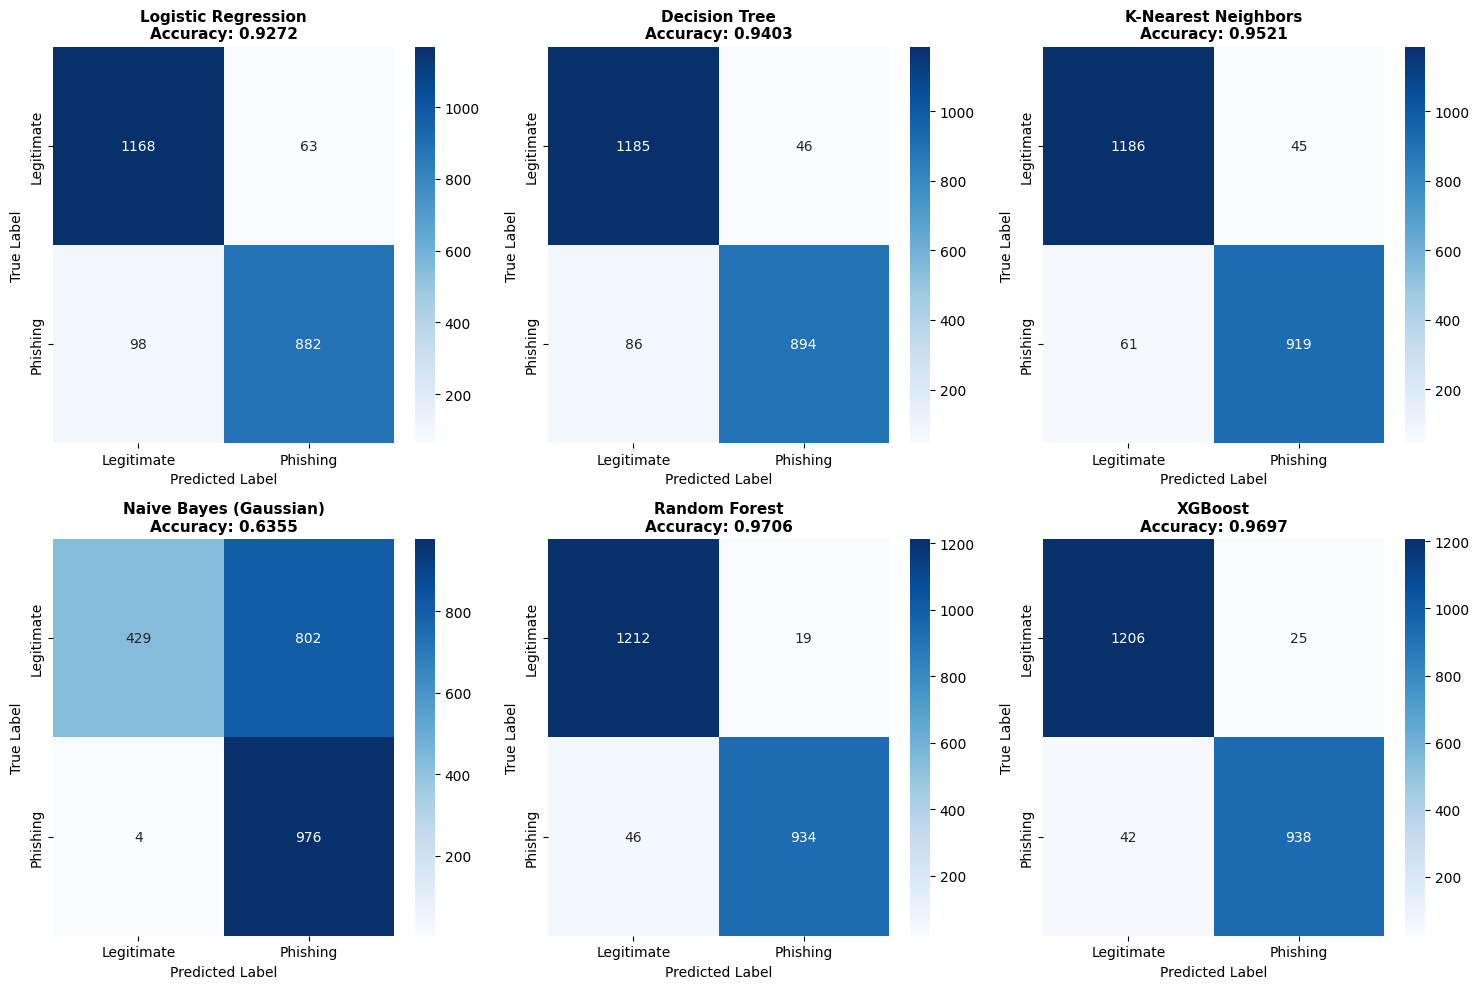

In [24]:
# SECTION 9: CONFUSION MATRICES VISUALIZATION

print("\n" + "="*80)
print("SECTION 9: CONFUSION MATRICES VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, predictions) in enumerate(model_predictions.items()):
    cm = confusion_matrix(y_test, predictions) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Legitimate', 'Phishing'],
                yticklabels=['Legitimate', 'Phishing'],
                cbar=True)
    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]["Accuracy"]:.4f}',
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('True Label', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# SECTION 10: SAVE TRAINED MODELS TO PICKLE FILES
import os
import pickle

print("\n" + "="*80)
print("SECTION 10: SAVING TRAINED MODELS TO PICKLE FILES")
print("="*80)

# Create models directory if it doesn't exist
models_dir = "D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Created '{models_dir}' directory")
else:
    print(f"'{models_dir}' directory already exists")

# Dictionary of all trained models with metadata
models_to_save = {
    'LogisticRegression': {
        'model': lr_model,
        'use_scaled': True,
        'description': 'Linear probabilistic classifier'
    },
    'DecisionTree': {
        'model': dt_model,
        'use_scaled': False,
        'description': 'Tree-based classifier'
    },
    'KNeighborsClassifier': {
        'model': knn_model,
        'use_scaled': True,
        'description': 'Instance-based k-NN classifier'
    },
    'GaussianNB': {
        'model': nb_model,
        'use_scaled': True,
        'description': 'Naive Bayes probabilistic classifier'
    },
    'RandomForest': {
        'model': rf_model,
        'use_scaled': False,
        'description': 'Ensemble decision tree classifier'
    },
    'XGBoost': {
        'model': xgb_model,
        'use_scaled': False,
        'description': 'Gradient boosting classifier'
    }
}

# Save each model to a pickle file
print("\n--- Saving Individual Models ---")
for model_name, model_info in models_to_save.items():
    model_obj = model_info['model']
    use_scaled = model_info['use_scaled']
    
    model_package = {
        'model': model_obj,
        'use_scaled': use_scaled,
        'description': model_info['description']
    }
    
    # Save to pickle file
    file_path = os.path.join(models_dir, f"{model_name}.pkl")
    try:
        with open(file_path, 'wb') as f:
            pickle.dump(model_package, f)
        print(f"Saved {model_name} to {file_path}")
    except Exception as e:
        print(f"Error saving {model_name}: {str(e)}")

print("\n--- Saving Feature Scaler ---")
scaler_path = os.path.join(models_dir, "scaler.pkl")
try:
    with open(scaler_path, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"Saved scaler to {scaler_path}")
except Exception as e:
    print(f"Error saving scaler: {str(e)}")

# Save test data for reference (optional, for Streamlit app sample data)
print("\n--- Saving Test Data Split Information ---")
test_data_path = os.path.join(models_dir, "test_data_info.pkl")
try:
    test_data_info = {
        'X_test': X_test,
        'y_test': y_test,
        'X_test_scaled': X_test_scaled,
        'feature_names': X.columns.tolist()
    }
    with open(test_data_path, 'wb') as f:
        pickle.dump(test_data_info, f)
    print(f"Saved test data info to {test_data_path}")
except Exception as e:
    print(f"Error saving test data: {str(e)}")

# Verify all files were created
print("\n--- Verification ---")
if os.path.exists(models_dir):
    files_in_dir = os.listdir(models_dir)
    print(f"Files in '{models_dir}/' directory:")
    for file in sorted(files_in_dir):
        file_path = os.path.join(models_dir, file)
        file_size = os.path.getsize(file_path) / 1024  # Size in KB
        print(f"{file} ({file_size:.2f} KB)")
    print(f"\nTotal files saved: {len(files_in_dir)}")
else:
    print(f"Error: '{models_dir}' directory was not created")

print("\n" + "="*80)
print("Model serialization complete!")
print("="*80)


SECTION 10: SAVING TRAINED MODELS TO PICKLE FILES
✓ Created 'D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models' directory

--- Saving Individual Models ---
Saved LogisticRegression to D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models\LogisticRegression.pkl
Saved DecisionTree to D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models\DecisionTree.pkl
Saved KNeighborsClassifier to D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models\KNeighborsClassifier.pkl
Saved GaussianNB to D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models\GaussianNB.pkl
Saved RandomForest to D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/models\RandomF

In [26]:
# SECTION 11: EXPORT TEST DATA TO CSV
print("\n" + "="*80)
print("SECTION 11: EXPORTING TEST DATA TO CSV")
print("="*80)

print("\n--- Creating Test Data DataFrame ---")
test_data_export = X_test.copy()

test_data_export['Actual_Class'] = y_test

print(f"Test data shape: {test_data_export.shape}")
print(f"  Rows (samples): {test_data_export.shape[0]}")
print(f"  Columns (features + target): {test_data_export.shape[1]}")

# Display class distribution in test data
print("\n--- Test Data Class Distribution ---")
print(f"Legitimate (0): {(y_test == 0).sum()} samples ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"Phishing (1): {(y_test == 1).sum()} samples ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")

# Save to CSV file
csv_file_path = "D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/test_data.csv"
print(f"\n--- Saving to CSV ---")
try:
    test_data_export.to_csv(csv_file_path, index=False)
    file_size = os.path.getsize(csv_file_path) / 1024  # Size in KB
    print(f"Test data exported successfully to '{csv_file_path}'")
    print(f"  File size: {file_size:.2f} KB")
    print(f"  Location: {os.path.abspath(csv_file_path)}")
except Exception as e:
    print(f"Error saving test data to CSV: {str(e)}")

# Display sample of exported data
print("\n--- Sample of Exported Test Data (first 5 rows) ---")
print(test_data_export.head())

print("\n--- Data Info ---")
print(f"Total test samples: {len(test_data_export)}")
print(f"Total features (including target): {len(test_data_export.columns)}")
print(f"Feature columns: {list(test_data_export.columns[:-1])}")
print(f"Target column: {test_data_export.columns[-1]}")

print("\n" + "="*80)
print("Test data export complete!")
print("="*80)


SECTION 11: EXPORTING TEST DATA TO CSV

--- Creating Test Data DataFrame ---
Test data shape: (2211, 39)
  Rows (samples): 2211
  Columns (features + target): 39

--- Test Data Class Distribution ---
Legitimate (0): 1231 samples (55.7%)
Phishing (1): 980 samples (44.3%)

--- Saving to CSV ---
Test data exported successfully to 'D:/BITS WILP MTECH CLASSES/SEMSTER 1/MACHINE LEARNING/ASSIGNMENT/ASSIGNMENT 2/ASSIGNMENT2-MACHINE_LEARNING/test_data.csv'
  File size: 255.73 KB
  Location: D:\BITS WILP MTECH CLASSES\SEMSTER 1\MACHINE LEARNING\ASSIGNMENT\ASSIGNMENT 2\ASSIGNMENT2-MACHINE_LEARNING\test_data.csv

--- Sample of Exported Test Data (first 5 rows) ---
       index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
9561    9562                          -1             -1                   1   
10427  10428                          -1             -1                  -1   
10998  10999                          -1             -1                   1   
756      757          